<a href="https://colab.research.google.com/github/PRIYAANGADI/Cluster-analysis/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data Visualization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [237]:
data ="/content/breast-cancer-wisconsin.csv" # variable holds the adress
df=pd.read_csv(data, header=None) # data frame is created

In [238]:
df.shape # rows and columns

(699, 11)

In [239]:
col_names=['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns=col_names # assigned column names to data frame columns

In [240]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [241]:
df.info() # summary data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [242]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')# converting object to numeric format for analysis
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_Cell_Size         699 non-null    int64  
 3   Uniformity_Cell_Shape        699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


None

In [243]:
df = df.drop(columns=['Id'])
df= df.dropna()
df.shape

(683, 10)

<Axes: >

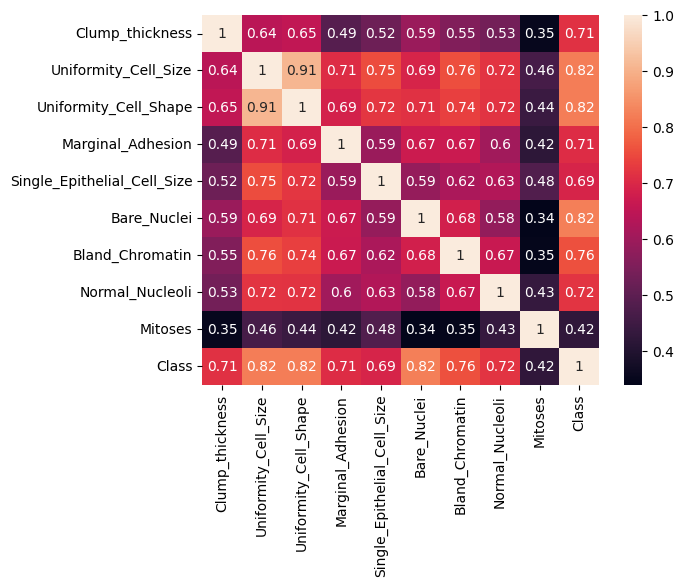

In [244]:
#plt.figure(figsize=(10,10))
corrmat = df.corr()
sns.heatmap(corrmat, annot= True)

In [245]:
df.describe() # values of mean, median, 25% etc

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [246]:
X= df.iloc[:, 0:9] # column 0 to 9 and all rows are input variables
y= df['Class'] # column 'Class' is predictive variable

In [247]:
scaler= StandardScaler()
X= scaler.fit_transform(X)
X =pd.DataFrame(X)


In [248]:
X =pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=18, test_size=0.2)

In [249]:
k_values = [i for i in range(1,31)]
stored_k_values =[]

for value in k_values:
    Knn = KNeighborsClassifier(n_neighbors=value)
    store = cross_val_score(Knn,X,y,cv=5)
    stored_k_values.append(np.mean(store).round(3))


Text(0.5, 0, 'K Values')

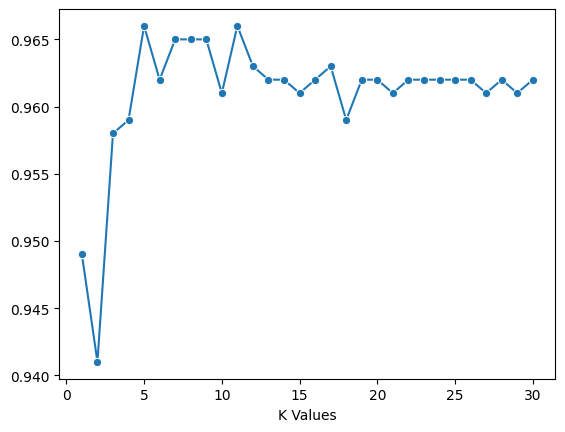

In [250]:
sns.lineplot(x=k_values, y = stored_k_values,marker='o')
plt.xlabel("K Values")

In [251]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [252]:
knn_model.score(X_test,y_test)


0.9635036496350365

In [253]:
y_pred = knn_model.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test,y_pred)}')

Accuracy score: 0.9635036496350365


In [254]:
cm = confusion_matrix(y_test,y_pred)
cm
pd.DataFrame(cm,
             index=[f"actual {l}" for l in sorted(set(y_test))],
             columns=[f"pred {l}" for l in sorted(set(y_test))])

,pred 2,pred 4
actual 2,79,2
actual 4,3,53
